In [1]:
# Importación de paquetes y data 

In [2]:
import pandas as pd 
import requests 
import json 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json('http://analytics.deacero.com/Api/GetApi/ApiHotelFull/ff7482d9-5203-5381-8d97-c769a4807328')

In [4]:
# EDA (Exploratory data analisis) y limpieza de datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  object 
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Se detecto que la variable children es objecto, el cual nos da como respuesta que hay Nan's

In [7]:
df['children'].value_counts()

0     110796
1       4861
2       3652
3         76
NA         4
10         1
Name: children, dtype: int64

In [8]:
df['children'] = df['children'].replace(to_replace= 'NA', value = 0)
df['children'] = df['children'].astype(int)
df['children'].value_counts()

0     110800
1       4861
2       3652
3         76
10         1
Name: children, dtype: int64

In [9]:
# Remplazamos nulos por 0 para futuro analisis 

In [10]:
df['agent'] = df['agent'].replace(to_replace= 'NULL', value = 0)
df['company'] = df['company'].replace(to_replace= 'NULL', value = 0)

In [11]:
df['total_stays_days'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_persons'] = df['adults'] + df['children'] + df['babies']

In [12]:
# Creación de dos dataframes, uno para el City Hotel y otro para el Resort Hotel y así poder obtener insights por hotel
df_r = df[df['hotel']=='Resort Hotel']
df_c = df[df['hotel']=='City Hotel']

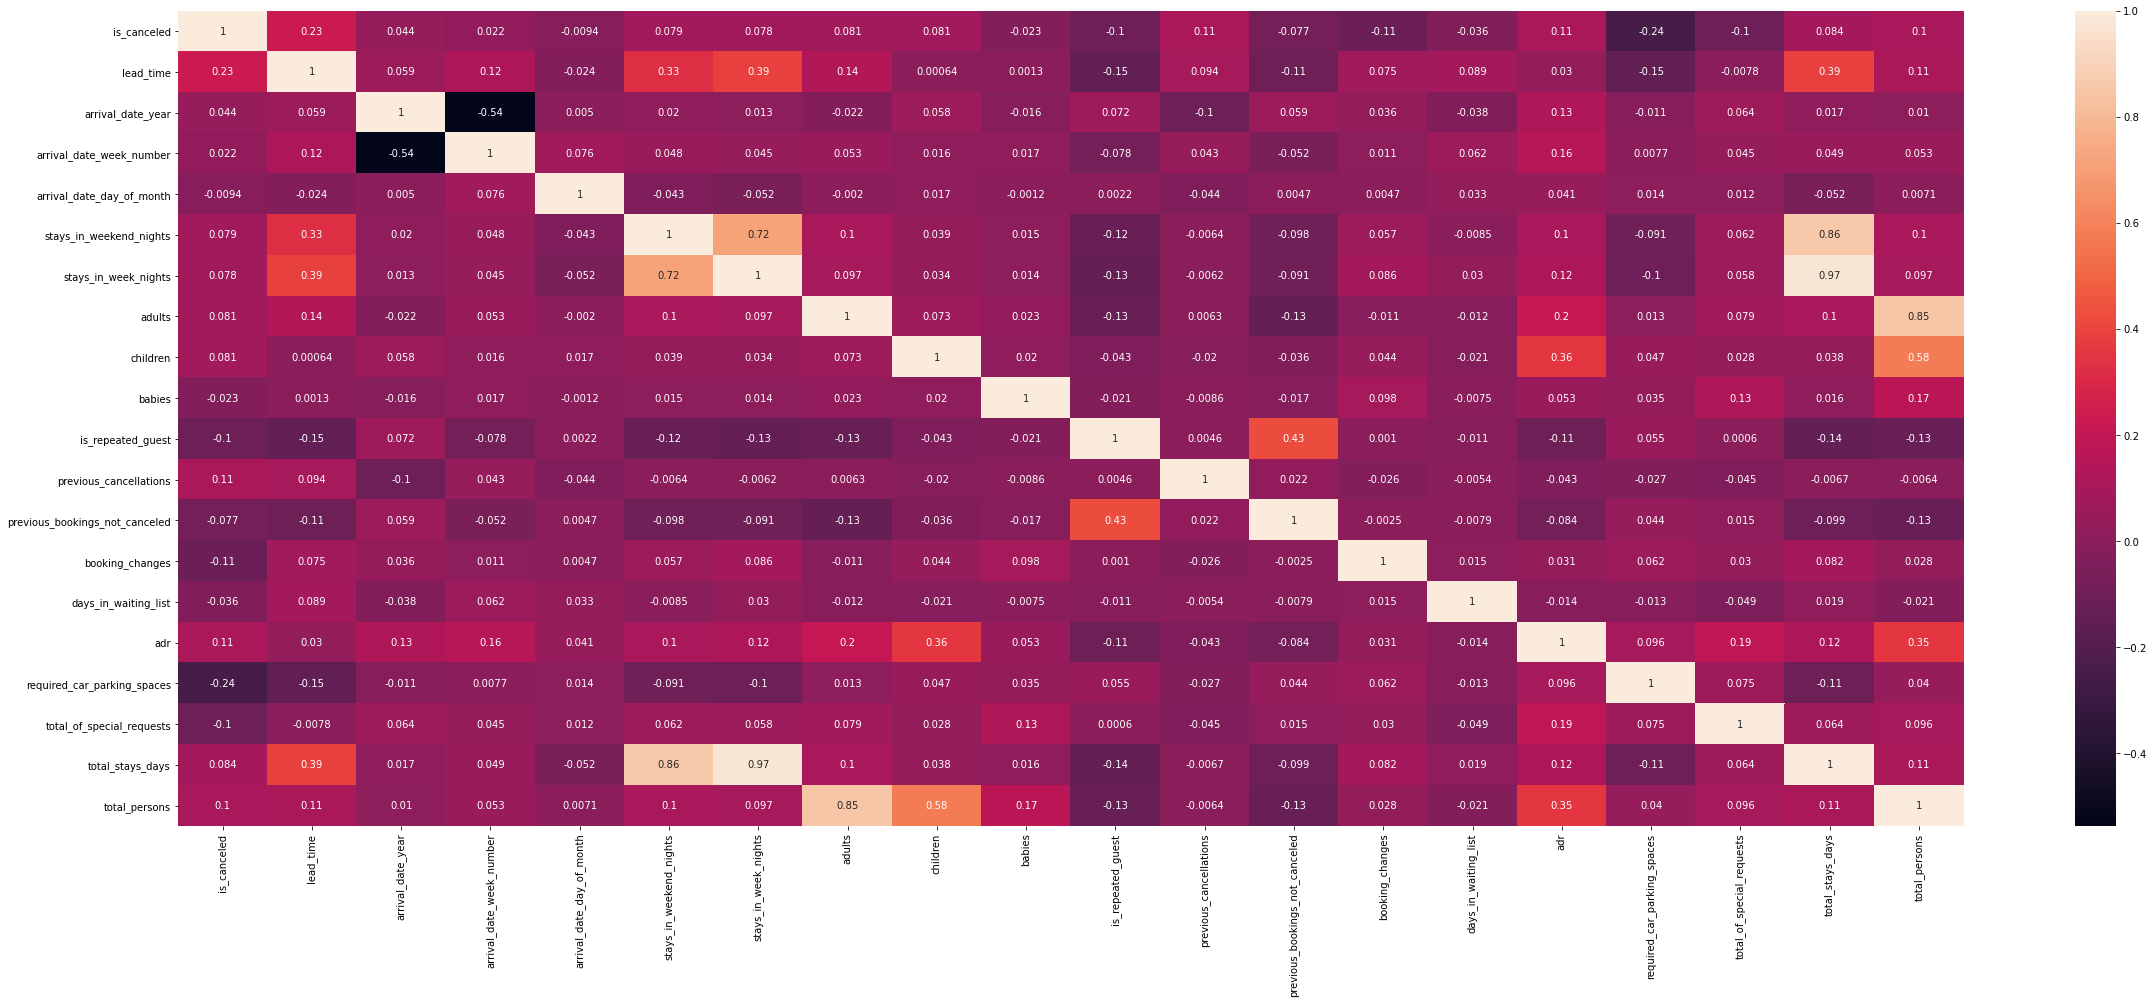

In [13]:
plt.figure(figsize=(40,15))
sns.heatmap(df_r.corr(), annot =True)

In [14]:
# Analizando la grafica, vemos que las correlaciones mas fuertes son para el Hotel Resort:
# - Si un huesped tiene noches durante la semana, es probable que tenga tambien el fin de semana ya que es un resort 
# - El huespued que ya asistio al hotel previamente, vuelve a ir y no cancela la reservación

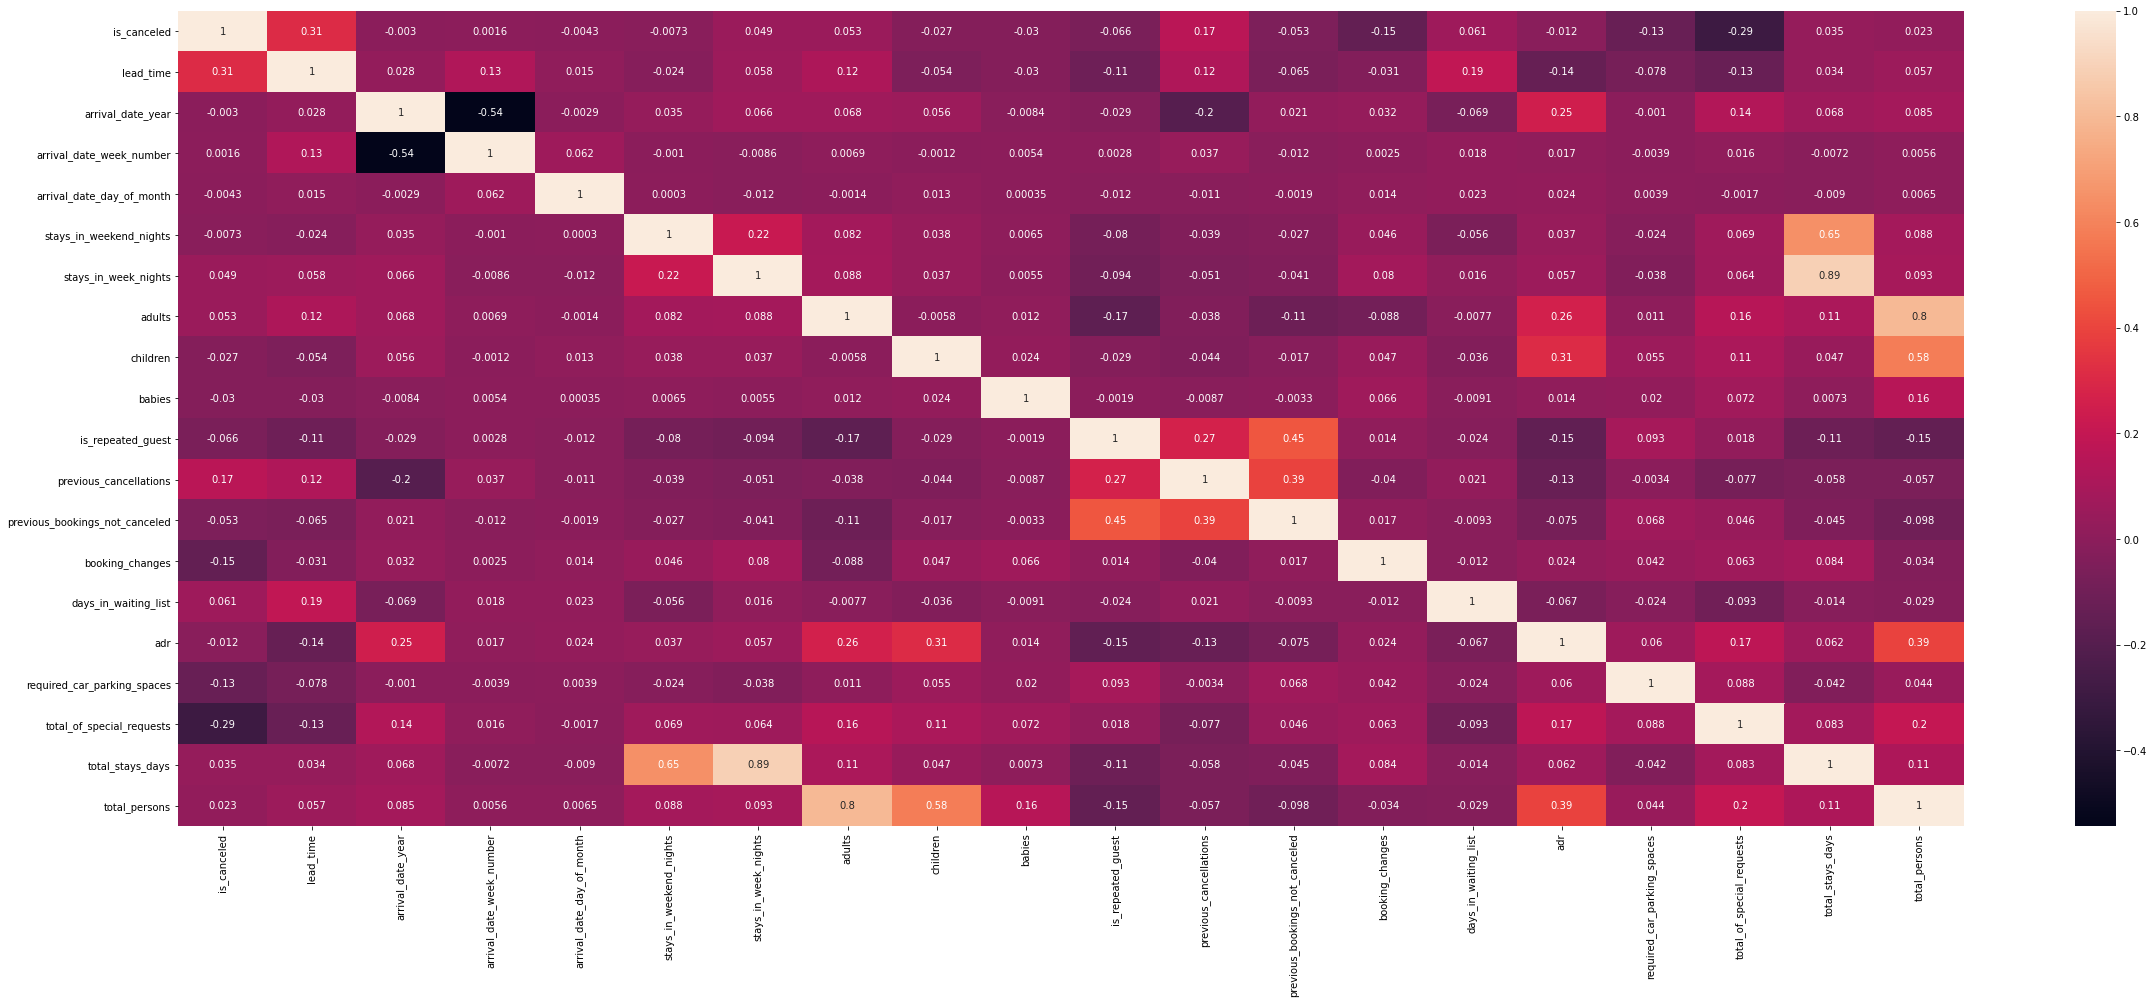

In [15]:
plt.figure(figsize=(40,15))
sns.heatmap(df_c.corr(), annot =True)

In [16]:
# A comparación con el Resort Hotel, el City Hotel tiene similar la lealtead y los huespedes que se han quedado anteriormente, vuelven a asistir. 
# Como es un hotel de la ciudad, no existe una correlacion fuerte para determinar que si el huesped se queda durante la semana tendera a quedarse durante el fin de semana 

In [17]:
# Creamos variables para el total de personas y total de dias hospedados, para futuro analisis 

### ¿De dónde vienen los huéspedes?



In [18]:
#Utilizaremos el top 8 de paises para poder ver la tendencia, para esta pregunta no eliminaremos data porque es necesario, ver donde hay interes y poder impulsar futuros esfuerzos para atraer a la gente y que no cancelen 

In [19]:
#Resort Hotel

In [20]:
df_1_r = df_r.groupby(['country'])['lead_time'].count().nlargest(8).reset_index()
df_1_r = df_1_r.rename(columns={"lead_time":"total"})
df_1_r

,country,total
0,PRT,17630
1,GBR,6814
2,ESP,3957
3,IRL,2166
4,FRA,1611
5,DEU,1203
6,CN,710
7,NLD,514


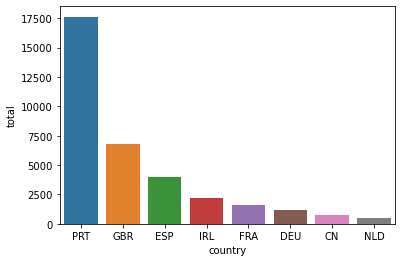

In [21]:
sns.barplot(x="country", y="total", data=df_1_r)

In [ ]:
# Tenemos nuestro top 8 paises en el hotel resort, para enofcar nuestros esfuerzos en estos paises 

In [22]:
#City Hotel 

In [23]:
df_1_c = df_c.groupby(['country'])['lead_time'].count().nlargest(8).reset_index()
df_1_c = df_1_c.rename(columns={"lead_time":"total"})
df_1_c

,country,total
0,PRT,30960
1,FRA,8804
2,DEU,6084
3,GBR,5315
4,ESP,4611
5,ITA,3307
6,BEL,1894
7,BRA,1794


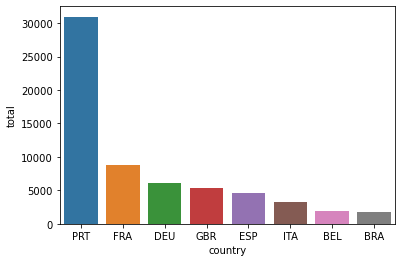

In [24]:
sns.barplot(x="country", y="total", data=df_1_c)

In [ ]:
# Tenemos nuestro top 8 paises en el hotel city, para enofcar nuestros esfuerzos en estos paises 

## ¿Cuánto pagan los huéspedes por una habitación por noche en promedio?

In [25]:
# Para esta sección eliminare los outilers de 0 y negativos, ya que queremos conocer cuanto pagan los huespedes y eso nos afectara el diagnostico 
# Tambien quisieramos conocer el promedio por total de huespedes 

In [26]:
# Resort Hotel

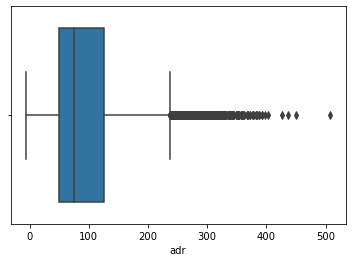

In [27]:
sns.boxplot(x=df_r['adr'])

In [28]:
df_r_2 = df_r[df_r['adr']>1]
df_r_2 = df_r_2[df_r_2['adr']<410]
df_r_2 = df_r_2[df_r_2['total_persons']>0]

In [29]:
round(df_r_2['adr'].mean(), 2)

96.74

In [ ]:
# La media del total es de 96.7 por habitación

In [30]:
# Quiero concer la mean por total de personas del 1 a 5 huespedes

In [31]:
df_r_2 = df_r_2[df_r_2['total_persons']<6]

In [32]:
round(df_r_2.groupby(['total_persons'])['adr'].mean().reset_index(),2)

,total_persons,adr
0,1,57.22
1,2,94.93
2,3,146.62
3,4,182.79
4,5,166.52


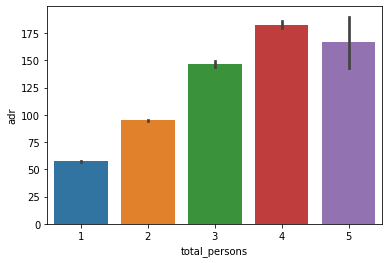

In [33]:
sns.barplot(x="total_persons", y="adr", data=df_r_2)

In [34]:
# Cuando llega a 5 personas el promedio baja, quiere decir que siempre agarran promociones y descuentos para poder ir, un factor a considerar para el Resort Hotel 

In [35]:
# City Hotel

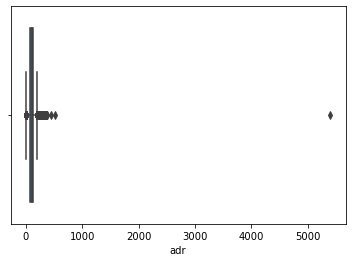

In [36]:
sns.boxplot(x=df_c['adr'])

In [ ]:
# Contamos con outliers, eliminamos para esta pregunta 

In [37]:
df_c_2 = df_c[df_c['adr']>1]
df_c_2 = df_c_2[df_c_2['adr']<1000]
df_c_2 = df_c_2[df_c_2['total_persons']>0]

In [38]:
df_c_2 = df_c_2[df_c_2['total_persons']<6]

In [39]:
round(df_c_2.groupby(['total_persons'])['adr'].mean().reset_index(),2)

,total_persons,adr
0,1,97.23
1,2,101.02
2,3,144.40
3,4,193.68
4,5,245.57


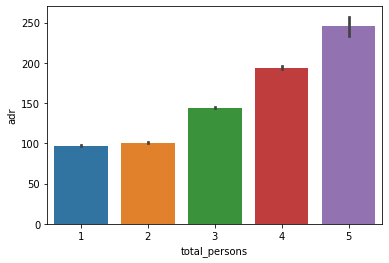

In [40]:
sns.barplot(x="total_persons", y="adr", data=df_c_2)

In [ ]:
# Cuando llega a 5 personas el promedio baja, quiere decir que siempre agarran promociones y descuentos para poder ir, un factor a considerar para el Resort City

## -¿Cuáles son los meses más ocupados?

In [41]:
# Resort Hotel

In [42]:
df_r.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays_days,total_persons
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,1/7/2015,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,1/7/2015,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2/7/2015,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2/7/2015,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,3/7/2015,2,2


In [43]:
df_r_3 = df_r.groupby(['arrival_date_month'])['lead_time'].count().reset_index()
df_r_3 = df_r_3.rename(columns={"lead_time":"total"})
df_r_3

,arrival_date_month,total
0,April,3609
1,August,4894
2,December,2648
3,February,3103
4,January,2193
5,July,4573
6,June,3045
7,March,3336
8,May,3559
9,November,2437


In [ ]:
# Julio es nuestro mes mas ocupado, tiene sentido ya que el hotel resort es para vacacionar 

In [48]:
df_r_3_can = df_r[df_r['is_canceled']==1]
df_r_3_can = df_r_3_can.groupby(['arrival_date_month'])['lead_time'].count().reset_index()
df_r_3_can = df_r_3_can.rename(columns={"lead_time":"total"})
df_r_3_can

,arrival_date_month,total
0,April,1059
1,August,1637
2,December,631
3,February,795
4,January,325
5,July,1436
6,June,1007
7,March,763
8,May,1024
9,November,461


In [ ]:
#Con esta tabla podremos tener un numero real de personas que asisten al hotel 

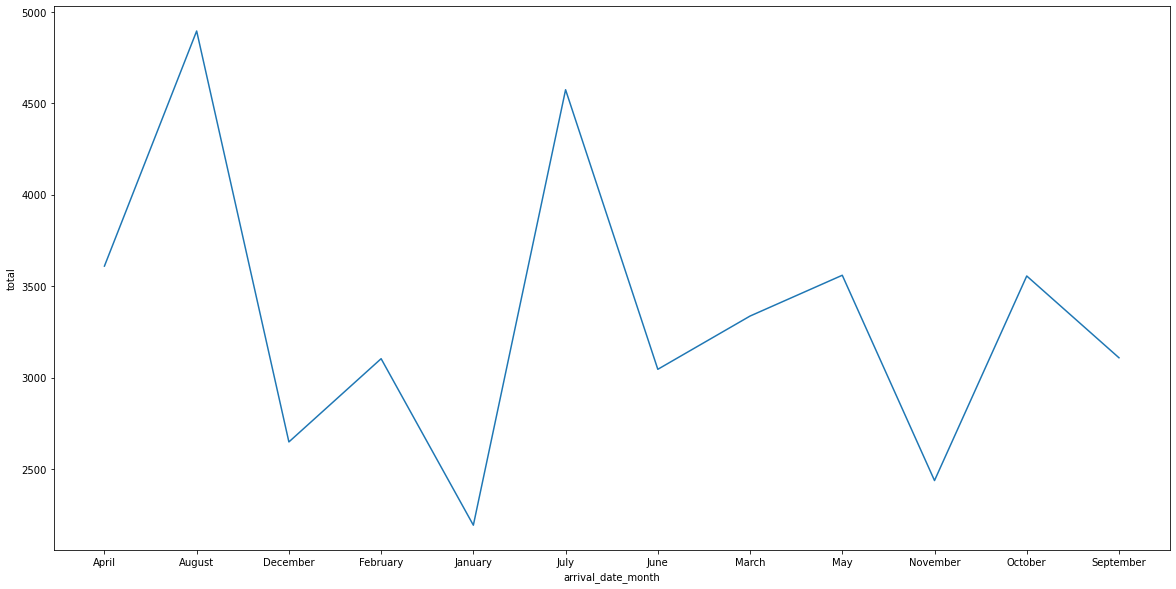

In [44]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_r_3, x="arrival_date_month", y="total", markers = True)

In [45]:
#City Hotel

In [46]:
df_c_3 = df_c.groupby(['arrival_date_month'])['lead_time'].count().reset_index()
df_c_3 = df_c_3.rename(columns={"lead_time":"total"})
df_c_3

,arrival_date_month,total
0,April,7480
1,August,8983
2,December,4132
3,February,4965
4,January,3736
5,July,8088
6,June,7894
7,March,6458
8,May,8232
9,November,4357


In [49]:
df_c_3_can = df_c[df_c['is_canceled']==1]
df_c_3_can = df_c_3_can.groupby(['arrival_date_month'])['lead_time'].count().reset_index()
df_c_3_can = df_c_3_can.rename(columns={"lead_time":"total"})
df_c_3_can

,arrival_date_month,total
0,April,3465
1,August,3602
2,December,1740
3,February,1901
4,January,1482
5,July,3306
6,June,3528
7,March,2386
8,May,3653
9,November,1661


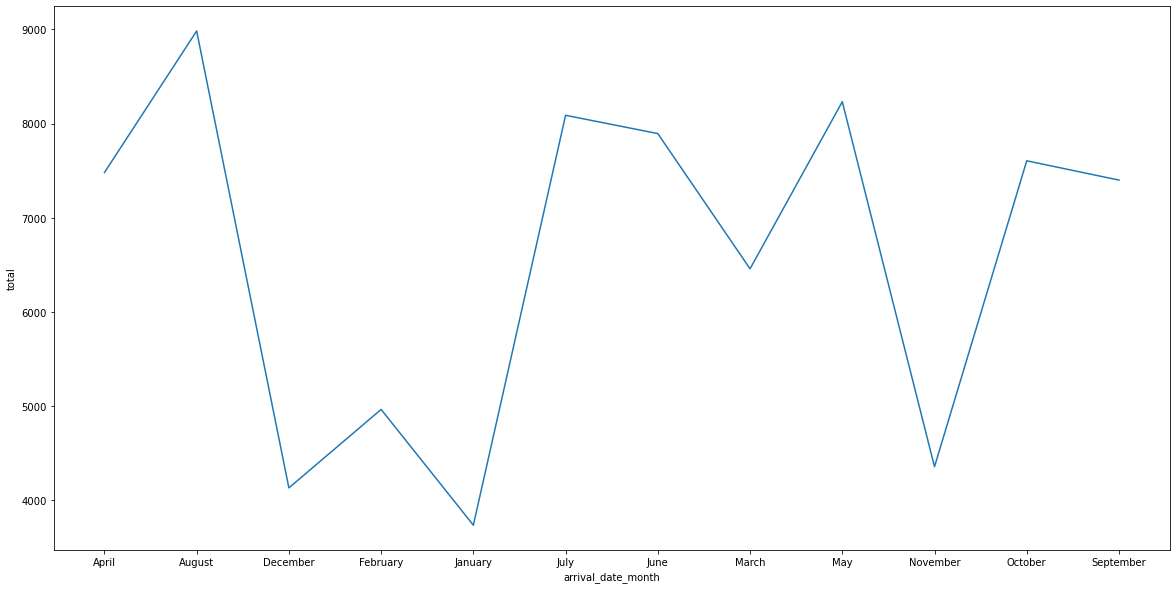

In [47]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_c_3, x="arrival_date_month", y="total", markers = True)

## -¿Cuánto tiempo se queda la gente en los hoteles (noches)?

In [55]:
#Resort Hotel 

In [56]:
df_r_4 = df_r[df_r['total_stays_days']>0]
df_r_4 =df_r_4.groupby(['total_stays_days'])['lead_time'].count().reset_index()
df_r_4 = df_r_4.rename(columns={"lead_time":"total"})

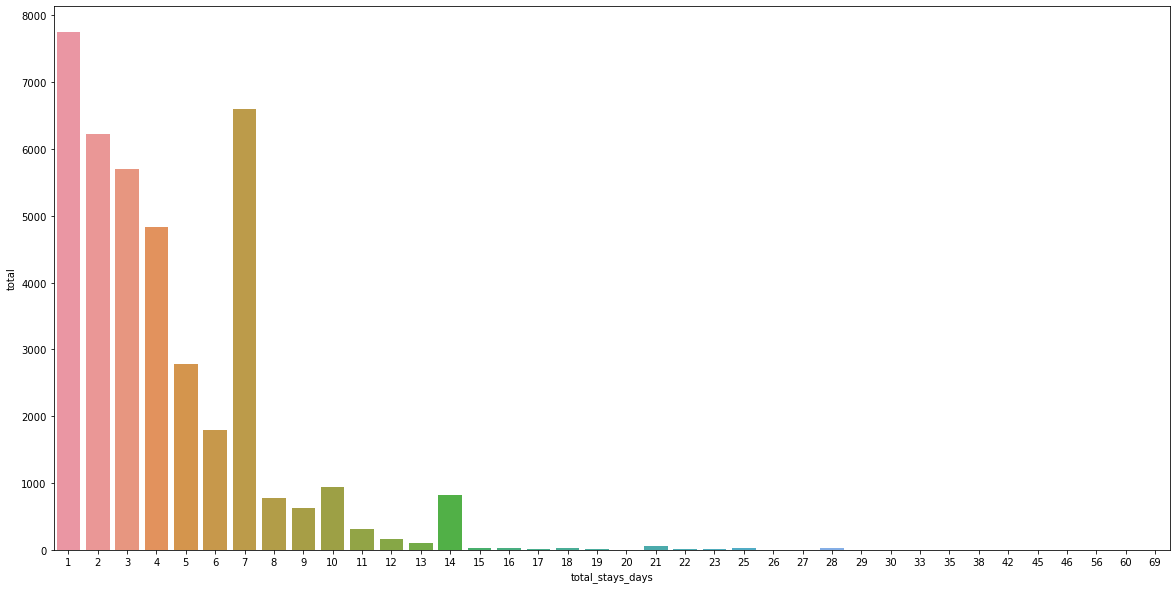

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(x="total_stays_days", y="total", data=df_r_4)

In [ ]:
# de 1 a 7 dias es cuando la gente aprovecha mas para asistir 

In [58]:
# City Hotel

In [59]:
df_c_4 = df_c[df_c['total_stays_days']>0]
df_c_4 =df_c_4.groupby(['total_stays_days'])['lead_time'].count().reset_index()
df_c_4 = df_c_4.rename(columns={"lead_time":"total"})

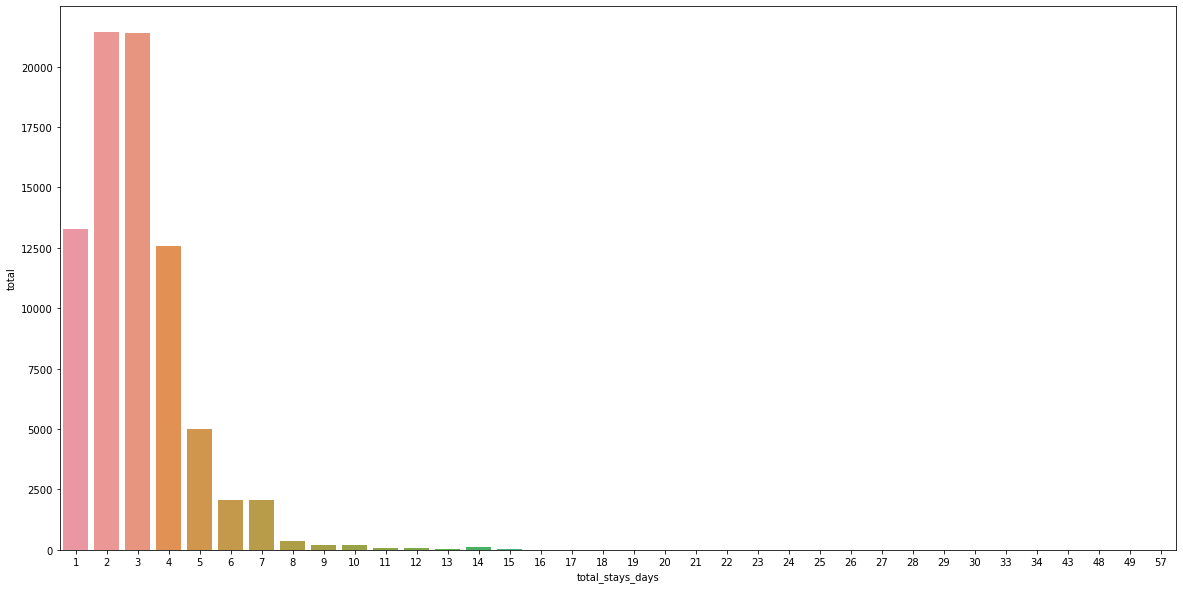

In [60]:
plt.figure(figsize=(20,10))
sns.barplot(x="total_stays_days", y="total", data=df_c_4)

In [ ]:
# Ya que es un hotel mas urbano, vemos que la gente tiende a quedarse de 1 a 4 dias 

## Reservas por segmento de Mercado 

In [170]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [61]:
df_r['market_segment'].value_counts()

Online TA        17729
Offline TA/TO     7472
Direct            6513
Groups            5836
Corporate         2309
Complementary      201
Name: market_segment, dtype: int64

In [62]:
df_c['market_segment'].value_counts()

Online TA        38748
Offline TA/TO    16747
Groups           13975
Direct            6093
Corporate         2986
Complementary      542
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
#Vemos que nuestro mercado mas atractivo por segmento es el e-commerece, para poder atraer mas gente 

## -¿Cuántas reservas se cancelaron?

In [63]:
df_5 = df[df['is_canceled']==1]

In [64]:
df_5.count()

hotel                             44224
is_canceled                       44224
lead_time                         44224
arrival_date_year                 44224
arrival_date_month                44224
arrival_date_week_number          44224
arrival_date_day_of_month         44224
stays_in_weekend_nights           44224
stays_in_week_nights              44224
adults                            44224
children                          44224
babies                            44224
meal                              44224
country                           44224
market_segment                    44224
distribution_channel              44224
is_repeated_guest                 44224
previous_cancellations            44224
previous_bookings_not_canceled    44224
reserved_room_type                44224
assigned_room_type                44224
booking_changes                   44224
deposit_type                      44224
agent                             44224
company                           44224


In [77]:
df_r_can.count()

hotel                             11122
is_canceled                       11122
lead_time                         11122
arrival_date_year                 11122
arrival_date_month                11122
arrival_date_week_number          11122
arrival_date_day_of_month         11122
stays_in_weekend_nights           11122
stays_in_week_nights              11122
adults                            11122
children                          11122
babies                            11122
meal                              11122
country                           11122
market_segment                    11122
distribution_channel              11122
is_repeated_guest                 11122
previous_cancellations            11122
previous_bookings_not_canceled    11122
reserved_room_type                11122
assigned_room_type                11122
booking_changes                   11122
deposit_type                      11122
agent                             11122
company                           11122


In [78]:
df_c_can.count()

hotel                             33102
is_canceled                       33102
lead_time                         33102
arrival_date_year                 33102
arrival_date_month                33102
arrival_date_week_number          33102
arrival_date_day_of_month         33102
stays_in_weekend_nights           33102
stays_in_week_nights              33102
adults                            33102
children                          33102
babies                            33102
meal                              33102
country                           33102
market_segment                    33102
distribution_channel              33102
is_repeated_guest                 33102
previous_cancellations            33102
previous_bookings_not_canceled    33102
reserved_room_type                33102
assigned_room_type                33102
booking_changes                   33102
deposit_type                      33102
agent                             33102
company                           33102


In [ ]:
# Tenemos 44,224 cancelaciones para en total, 11,122 para el resort y 33,102 para el city 

### -¿Qué mes tiene el mayor número de cancelaciones?

In [71]:
df_r_can = df_r[df_r['is_canceled']==1]

In [72]:
df_6 = df_r_can.groupby(['arrival_date_month'])['is_canceled'].count().reset_index()
df_6 = df_6.rename(columns={"is_canceled":"total"})
df_6.sort_values(by = "total")

,arrival_date_month,total
4,January,325
9,November,461
2,December,631
7,March,763
3,February,795
10,October,978
11,September,1006
6,June,1007
8,May,1024
0,April,1059


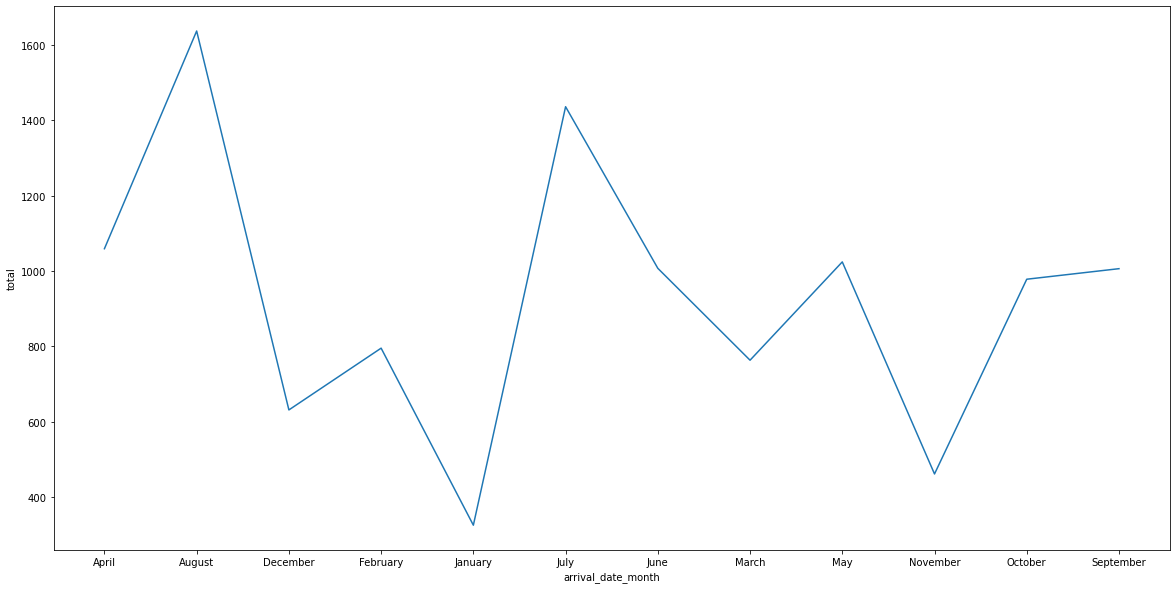

In [73]:
plt.figure(figsize=(20,10))
sns.lineplot(x="arrival_date_month", y="total", data=df_6)

In [74]:
#City Hotel 

In [75]:
df_c_can = df_c[df_c['is_canceled']==1]
df_7 = df_c_can.groupby(['arrival_date_month'])['is_canceled'].count().reset_index()
df_7 = df_7.rename(columns={"is_canceled":"total"})
df_7.sort_values(by = "total")

,arrival_date_month,total
4,January,1482
9,November,1661
2,December,1740
3,February,1901
7,March,2386
11,September,3110
10,October,3268
5,July,3306
0,April,3465
6,June,3528


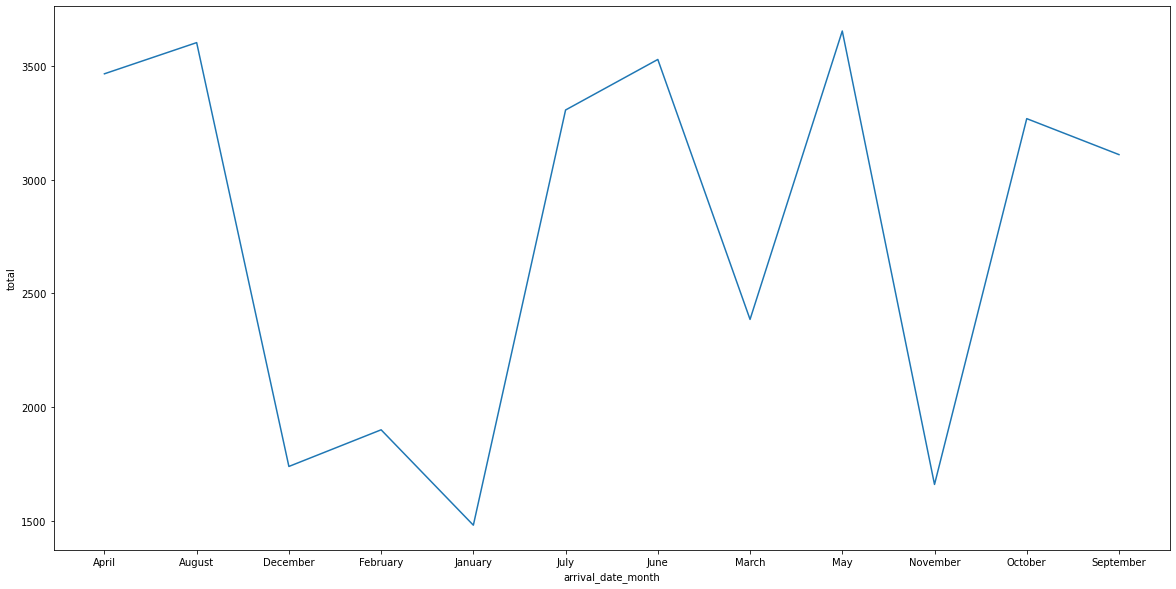

In [76]:
plt.figure(figsize=(20,10))
sns.lineplot(x="arrival_date_month", y="total", data=df_7)

In [ ]:
# Los meses con mas trafico son los meses con mas cancelaciones, es un patron similar por meses 